In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv

In [5]:
def get_labels(csvfile):
    with open(csvfile) as f:
        reader = csv.reader(f, delimiter=',')
        # get the first line in csv
        labels = reader.__next__()
        # return just the letters from pos 1 on
        return labels[1:]
                            
def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

In [6]:
data = np.genfromtxt('CIELNET.csv', delimiter=',')

In [7]:
adjacency = data[1:,1:]


In [8]:
rows, cols = np.where(adjacency == 1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_edges_from(edges)

In [9]:
rows, cols = np.where(adjacency == 1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
all_rows = range(0, adjacency.shape[0])
for n in all_rows:
    G.add_node(n)
G.add_edges_from(edges)

In [10]:
labels= make_label_dict(get_labels('CIELNET.csv'))
#labels= get_labels('CIELNET.csv')

In [11]:
def plot_directed_graph_spiral(G):
    pos = nx.spiral_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [12]:
def plot_directed_graph_spring(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [13]:
def plot_directed_graph_spring(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [14]:
def plot_directed_graph_spectral(G):
    pos = nx.spectral_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [15]:
def plot_directed_graph_shell(G):
    pos = nx.shell_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

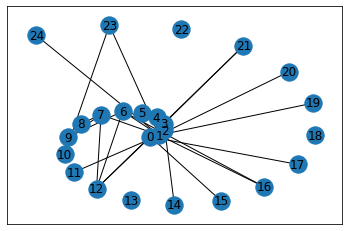

In [16]:
plot_directed_graph_spiral(G)

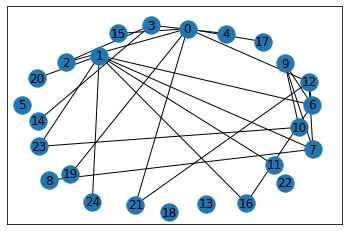

In [17]:
plot_directed_graph_spring(G)

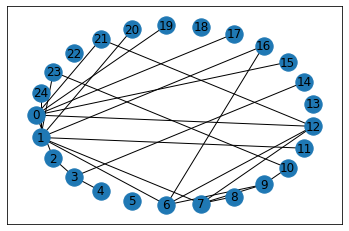

<Figure size 432x288 with 0 Axes>

In [18]:
plot_directed_graph_shell(G)
plt.savefig('PartCshell_layout.png')

In [19]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.hist(degrees)
    

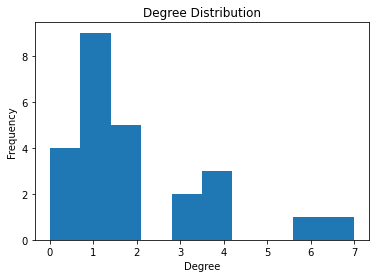

In [20]:
plot_degree_dist(G)
plt.savefig('Q3_degree_distribution.png')


In [21]:
degree_freq = nx.degree_histogram(G)

G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
total_degree = sum(G_deg_sum)

avg_k = sum(G_deg_sum) / G.number_of_nodes()
print(avg_k)

2.0


In [22]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[(1, 7),
 (0, 6),
 (6, 4),
 (7, 4),
 (12, 4),
 (3, 3),
 (9, 3),
 (2, 2),
 (10, 2),
 (16, 2),
 (21, 2),
 (23, 2),
 (4, 1),
 (8, 1),
 (11, 1),
 (14, 1),
 (15, 1),
 (17, 1),
 (19, 1),
 (20, 1),
 (24, 1),
 (5, 0),
 (13, 0),
 (18, 0),
 (22, 0)]

In [23]:
labels

{0: 'N1',
 1: 'N2',
 2: 'N3',
 3: 'N4',
 4: 'N5',
 5: 'N6',
 6: 'N7',
 7: 'N8',
 8: 'N9',
 9: 'N10',
 10: 'N11',
 11: 'N12',
 12: 'N13',
 13: 'N14',
 14: 'N15',
 15: 'N16',
 16: 'N17',
 17: 'N18',
 18: 'N19',
 19: 'N20',
 20: 'N21',
 21: 'N22',
 22: 'N23',
 23: 'N24',
 24: 'N25'}

In [24]:
def voter_model(G, initial_red_fraction=0.6, max_steps=10000):
    colors = ['red' if np.random.rand() < initial_red_fraction else 'blue' for _ in G.nodes()]
    nx.set_node_attributes(G, {i: colors[i] for i in G.nodes()}, 'color')

    for _ in range(max_steps):
        node = np.random.choice(G.nodes())
        neighbors = list(G.neighbors(node))
        if neighbors:
            G.nodes[node]['color'] = G.nodes[np.random.choice(neighbors)]['color']
        if len(set(nx.get_node_attributes(G, 'color').values())) == 1:
            return _
    return max_steps


In [25]:
runs = 100
times = [voter_model(G) for _ in range(runs)]
average_time = np.mean(times)
print(f"Average time to reach consensus over {runs} runs: {average_time}")



Average time to reach consensus over 100 runs: 9125.37
